In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

Saved 'plot_execution_time.png'


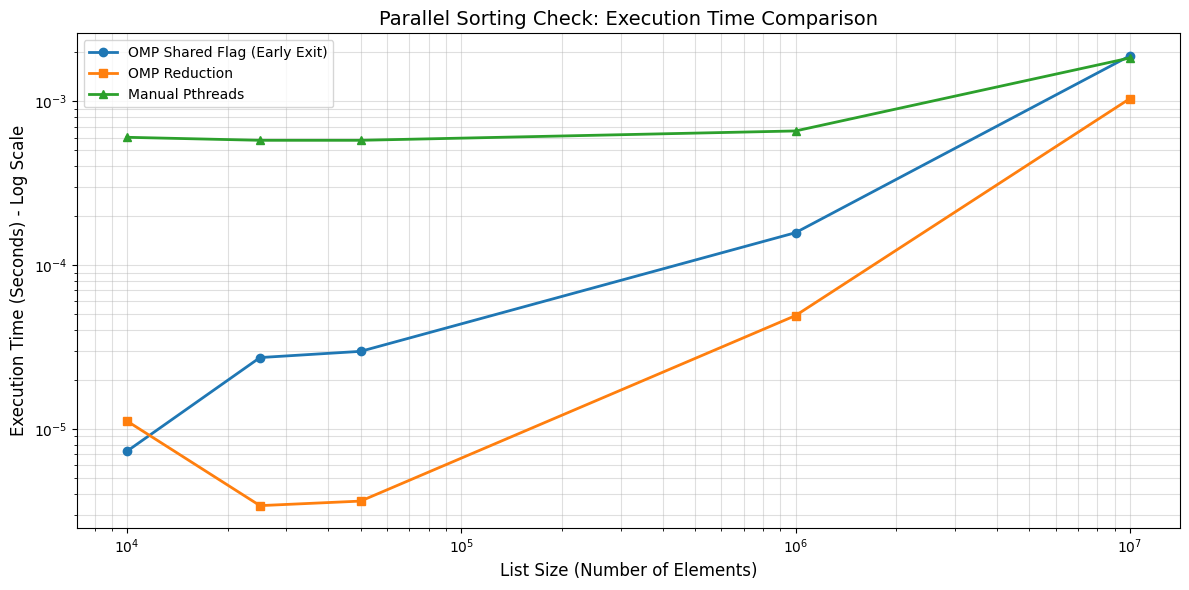

Saved 'plot_cpu_utilization.png'


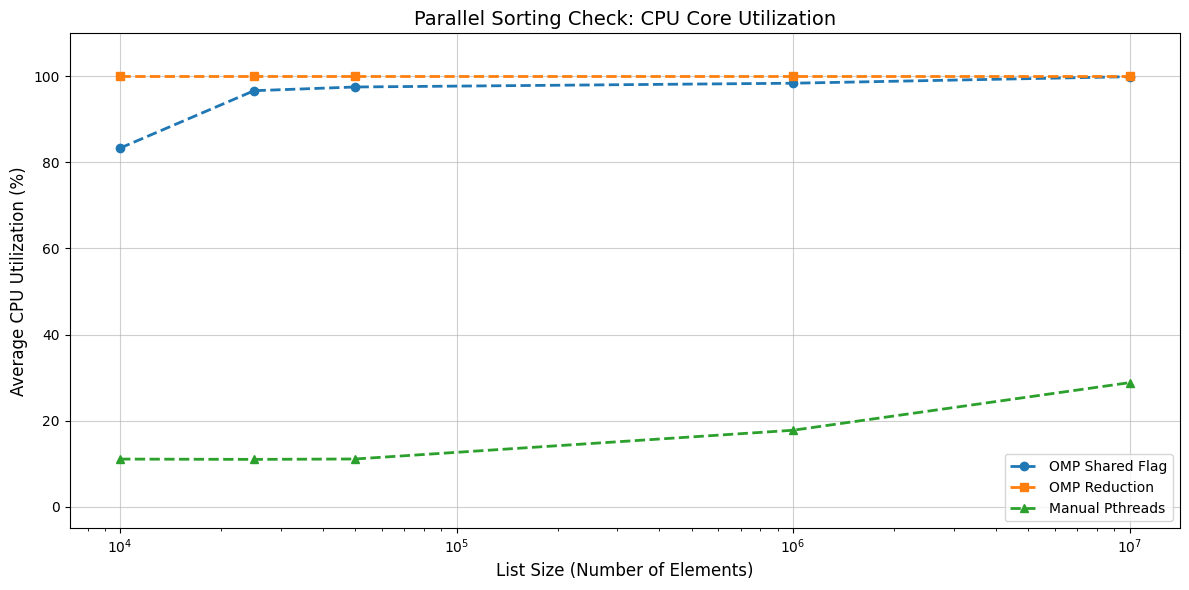

In [ ]:
csv_file = 'new.csv'

if not os.path.exists(csv_file):
    print(f"Error: '{csv_file}' not found. Please run the C++ code first.")
    exit(1)

try:
    df = pd.read_csv(csv_file)
except Exception as e:
    print(f"Error reading CSV: {e}")
    exit(1)

df = df.sort_values(by='Size')


plt.figure(figsize=(12, 6))

plt.plot(df['Size'], df['OMP_Flag_Time'], marker='o', label='OMP Shared Flag (Early Exit)', linewidth=2)
plt.plot(df['Size'], df['OMP_Red_Time'], marker='s', label='OMP Reduction', linewidth=2)
plt.plot(df['Size'], df['Manual_Time'], marker='^', label='Manual Pthreads', linewidth=2)

plt.xscale('log')
plt.yscale('log') 
plt.xlabel('List Size (Number of Elements)', fontsize=12)
plt.ylabel('Execution Time (Seconds) - Log Scale', fontsize=12)
plt.title('Parallel Sorting Check: Execution Time Comparison', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.4)

plt.tight_layout()
plt.savefig('plot_execution_time.png')
print("Saved 'plot_execution_time.png'")
plt.show()


plt.figure(figsize=(12, 6))

plt.plot(df['Size'], df['OMP_Flag_CPU'], marker='o', label='OMP Shared Flag', linewidth=2, linestyle='--')
plt.plot(df['Size'], df['OMP_Red_CPU'], marker='s', label='OMP Reduction', linewidth=2, linestyle='--')
plt.plot(df['Size'], df['Manual_CPU'], marker='^', label='Manual Pthreads', linewidth=2, linestyle='--')

plt.xscale('log')
plt.ylim(-5, 110) 
plt.xlabel('List Size (Number of Elements)', fontsize=12)
plt.ylabel('Average CPU Utilization (%)', fontsize=12)
plt.title('Parallel Sorting Check: CPU Core Utilization', fontsize=14)
plt.legend()
plt.grid(True, which="major", ls="-", alpha=0.6)

if (df['OMP_Red_CPU'] == 0).any():
    plt.text(0.5, 0.05, "Note: 0% utilization on small lists is due to OS sampling resolution.", 
             transform=plt.gca().transAxes, ha='center', color='red', fontsize=9, 
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('plot_cpu_utilization.png')
print("Saved 'plot_cpu_utilization.png'")
plt.show()